In [1]:
import pandas as pd
import numpy as np

In [2]:
sample_data = pd.read_csv('data/cf_sampledata1.csv')

In [3]:
sample_data.dtypes

BranchId                          int64
CountryCode                      object
CountryName                      object
ProductId                         int64
Currency                         object
EffectiveDate                    object
TotalCashIn                     float64
TotalCashOut                    float64
StockInOut                      float64
ForexInOut                      float64
CashUpOverUnder                 float64
CashInDeposit                     int64
CashInPmntOrdersCount             int64
CashInPmntOrdersAmount            int64
CashOutOrdersCount                int64
CashOutOrdersAmount             float64
AvgCashOutOrdersAmount          float64
CashOrdersCheck                 float64
CashOrdersCheckDiff               int64
AvgPlannedOrderAmount           float64
PlannedCashOrderCount             int64
PettyCashOut                    float64
DayOfWeekName                    object
PublicHolidayInOfficeCountry      int64
PublicHolidayAngola               int64


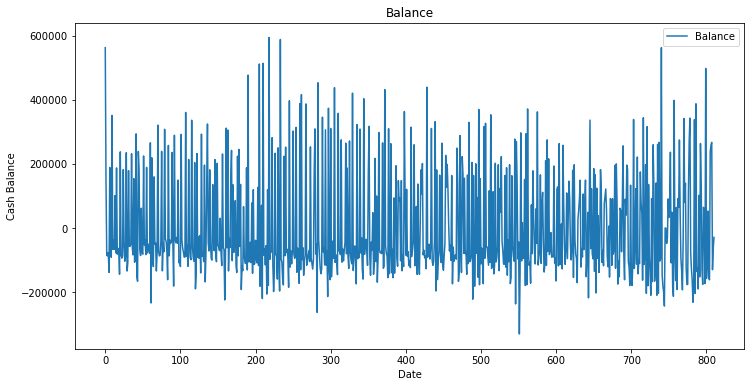

In [5]:
import matplotlib.pyplot as plt

# Plot the cash balance data
sample_data[['EffectiveDate','Balance']].plot(figsize=(12, 6))
plt.title('Balance')
plt.ylabel('Cash Balance')
plt.xlabel('Date')
plt.show()

## Decompose the Time Series

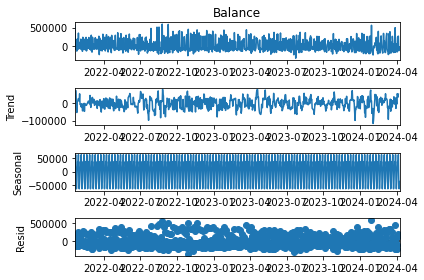

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
# Assuming 'sample_data' is your DataFrame and it contains columns 'EffectiveDate' and 'Balance'
# First, ensure that 'EffectiveDate' is of datetime type and set it as the index
sample_data['EffectiveDate'] = pd.to_datetime(sample_data['EffectiveDate'])
sample_data.set_index('EffectiveDate', inplace=True)

# Now, you can decompose the time series
result = seasonal_decompose(sample_data['Balance'], model='additive')

# Plot the decomposed components
result.plot()
plt.show()

## Test for Stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(sample_data['Balance'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -10.368693
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


## Autocorrelation and Partial Autocorrelation

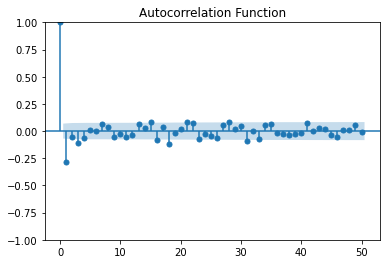

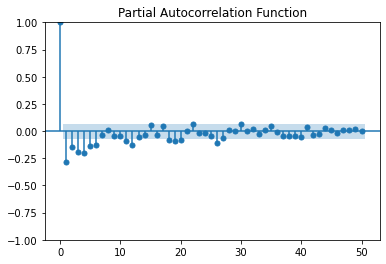

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation
plot_acf(sample_data['Balance'], lags=50)
plt.title('Autocorrelation Function')
plt.show()

# Plot partial autocorrelation
plot_pacf(data, lags=50, method='yw')
plt.title('Partial Autocorrelation Function')
plt.show()


In [12]:
data = sample_data['Balance']

                               SARIMAX Results                                
Dep. Variable:                Balance   No. Observations:                  811
Model:                ARIMA(1, 14, 0)   Log Likelihood              -17032.456
Date:                Mon, 13 May 2024   AIC                          34068.913
Time:                        09:27:38   BIC                          34078.275
Sample:                    01-19-2022   HQIC                         34072.510
                         - 04-08-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9346      0.014    -67.139      0.000      -0.962      -0.907
sigma2      2.136e+17   9.14e-22   2.34e+38      0.000    2.14e+17    2.14e+17
Ljung-Box (L1) (Q):                 549.49   Jarque-

/Users/christostrydom/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/christostrydom/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/christostrydom/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


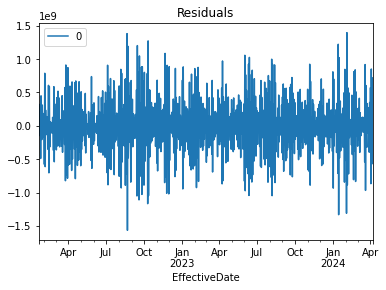

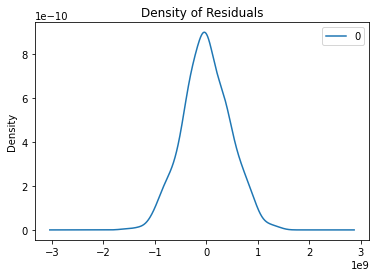

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' is your time series
model = ARIMA(data, order=(1,14,0))  # ARIMA(p,d,q) where p is the AR term, d is the differencing, and q is the MA term
results = model.fit()

# Summary of the model
print(results.summary())

# Plot residual errors
residuals = pd.DataFrame(results.resid)
residuals.plot(title="Residuals")
plt.show()

residuals.plot(kind='kde', title='Density of Residuals')
plt.show()

# Check the goodness of fit and adjust the model parameters as needed


In [15]:

# Calculate the daily difference in balance
sample_data['daily_difference'] = sample_data['Balance'].diff()

print(sample_data)

               BranchId CountryCode CountryName  ProductId Currency  \
EffectiveDate                                                         
2022-01-19           21          ZM      Zambia         72      ZMW   
2022-01-20           21          ZM      Zambia         72      ZMW   
2022-01-21           21          ZM      Zambia         72      ZMW   
2022-01-22           21          ZM      Zambia         72      ZMW   
2022-01-23           21          ZM      Zambia         72      ZMW   
...                 ...         ...         ...        ...      ...   
2024-04-04           21          ZM      Zambia         72      ZMW   
2024-04-05           21          ZM      Zambia         72      ZMW   
2024-04-06           21          ZM      Zambia         72      ZMW   
2024-04-07           21          ZM      Zambia         72      ZMW   
2024-04-08           21          ZM      Zambia         72      ZMW   

               TotalCashIn  TotalCashOut  StockInOut  ForexInOut  \
Effectiv

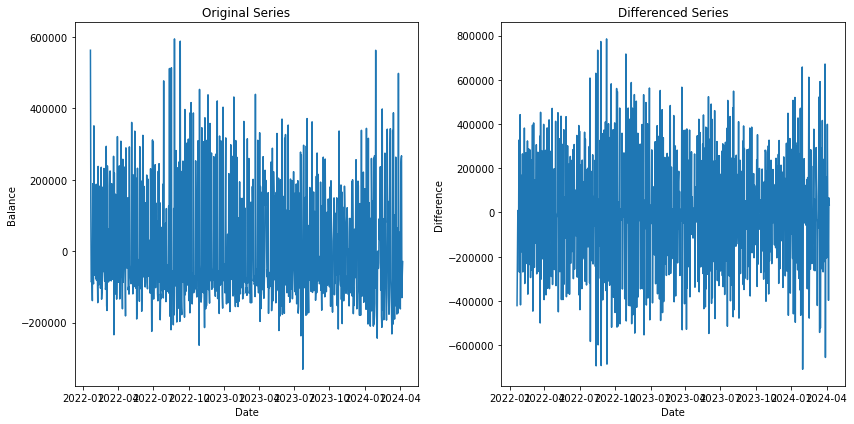

In [16]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with an existing 'balance' column and 'daily_difference' has been calculated
plt.figure(figsize=(12, 6))

# Plot the original series
plt.subplot(1, 2, 1)
plt.plot(sample_data['Balance'])
plt.title('Original Series')
plt.xlabel('Date')
plt.ylabel('Balance')

# Plot the differenced series
plt.subplot(1, 2, 2)
plt.plot(sample_data['daily_difference'])
plt.title('Differenced Series')
plt.xlabel('Date')
plt.ylabel('Difference')

plt.tight_layout()
plt.show()
